## Setup

## Create dataset from directory

In [10]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import tensorflow as tf
from pathlib import Path

IMG_WIDTH = IMG_HEIGHT = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
  Path('chest_xray/train'),
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=64,
  class_names=['normal', 'pneumonia'],
  label_mode='binary',
  color_mode='grayscale',
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  Path('chest_xray/val'),
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=64,
  class_names=['normal', 'pneumonia'],
  label_mode='binary',
  color_mode='grayscale',
)

test_ds = tf.keras.utils.image_dataset_from_directory(
  Path('chest_xray/test'),
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=64,
  class_names=['normal', 'pneumonia'],
  label_mode='binary',
  color_mode='grayscale',
)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


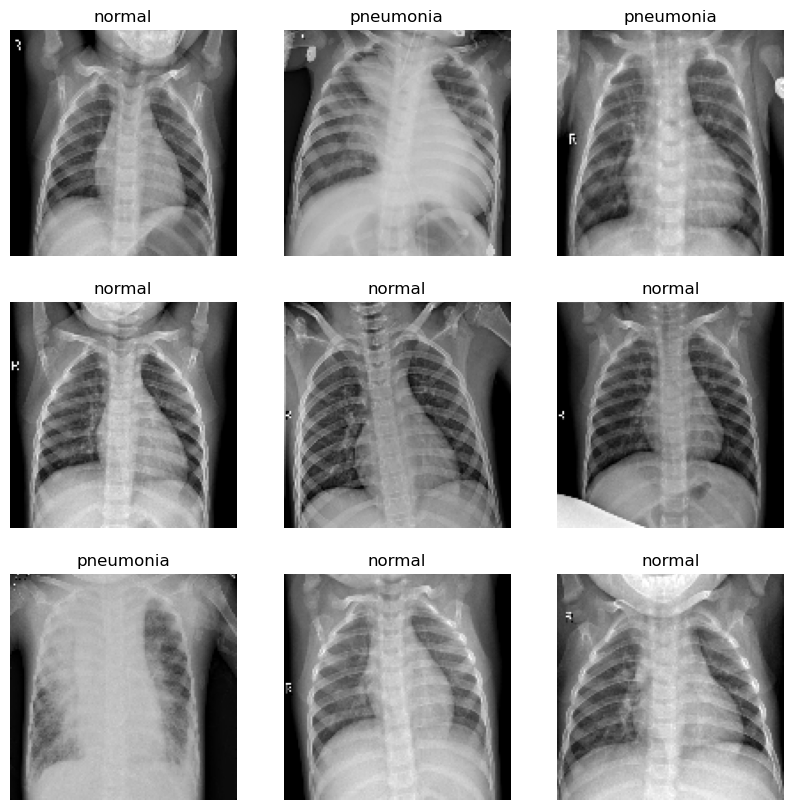

In [11]:
import matplotlib.pyplot as plt

# Extract a batch of images and labels from the training dataset
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f'{train_ds.class_names[int(labels[i])]}')
        plt.axis('off')

    plt.show()

## Compute class weights

In [12]:
import numpy as np

# Initialize class counts
class_counts = np.zeros(len(train_ds.class_names), dtype=np.int64)

# Iterate over the dataset to count samples in each class
for images, labels in train_ds:
    flattened_labels = tf.cast(labels, dtype=tf.int64)  # Cast labels to int64
    flattened_labels = tf.reshape(flattened_labels, [-1])  # Flatten the labels
    class_counts += np.bincount(flattened_labels.numpy(), minlength=len(train_ds.class_names))

# Compute total number of samples
total_samples = np.sum(class_counts)

# Compute class weights
num_classes = len(train_ds.class_names)
class_weights = {i: total_samples / (num_classes * count) for i, count in enumerate(class_counts)}

In [13]:
class_weights

{0: 1.9448173005219984, 1: 0.6730322580645162}

## Create CNN model

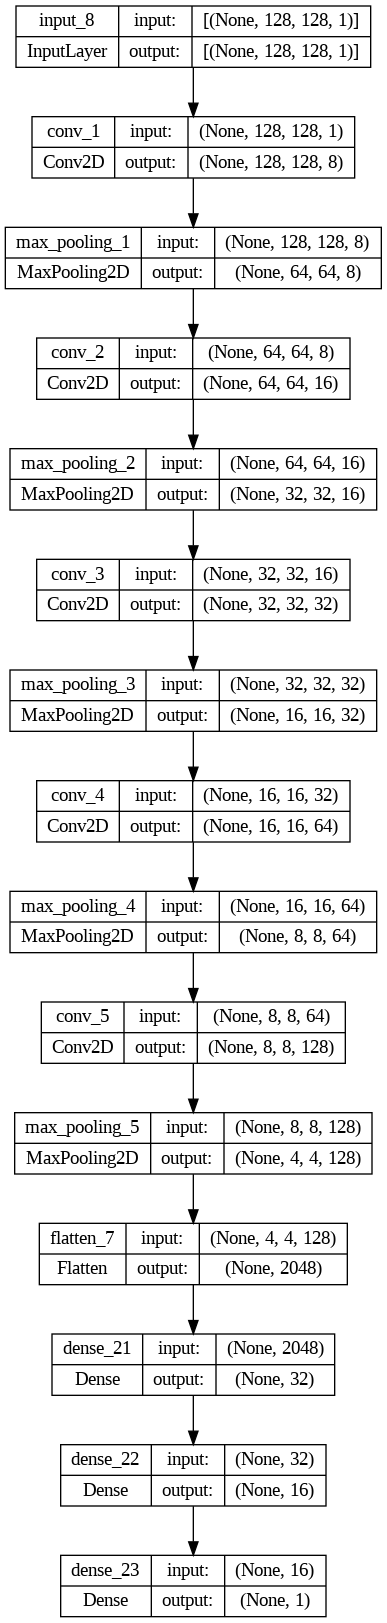

In [44]:
from tensorflow.keras import (
    layers,
    activations,
    Model,
    optimizers,
    losses
)

# Define CNN model
input = layers.Input((IMG_HEIGHT, IMG_WIDTH, 1))

# TODO: Complete this in order to have the same architecture
# as the one represented in the cell above
# note: use convolutions with relu and kernel size of 3.

# First Conv2D and MaxPooling2D layers
conv1 = Conv2D(8, (1, 1), activation='relu', name='conv_1')(input)
max_pool1 = MaxPooling2D(pool_size=(2, 2), name='max_pooling_1')(conv1)

# Second Conv2D and MaxPooling2D layers
conv2 = Conv2D(16, (1, 1), activation='relu', name='conv_2')(max_pool1)
max_pool2 = MaxPooling2D(pool_size=(2, 2), name='max_pooling_2')(conv2)

# Third Conv2D and MaxPooling2D layers
conv3 = Conv2D(32, (1, 1), activation='relu', name='conv_3')(max_pool2)
max_pool3 = MaxPooling2D(pool_size=(2, 2), name='max_pooling_3')(conv3)

# Fourth Conv2D and MaxPooling2D layers
conv4 = Conv2D(64, (1, 1), activation='relu', name='conv_4')(max_pool3)
max_pool4 = MaxPooling2D(pool_size=(2, 2), name='max_pooling_4')(conv4)

# Fifth Conv2D and MaxPooling2D layers
conv5 = Conv2D(128, (1, 1), activation='relu', name='conv_5')(max_pool4)
max_pool5 = MaxPooling2D(pool_size=(2, 2), name='max_pooling_5')(conv5)

# Flatten layer
flatten = Flatten(name='flatten_7')(max_pool5)

# Dense layers
dense1 = Dense(32, activation='relu', name='dense_21')(flatten)
dense2 = Dense(16, activation='relu', name='dense_22')(dense1)

cnn_output = layers.Dense(1, activation='sigmoid')(dense2)

cnn = Model(inputs=input, outputs=cnn_output)

# Compile CNN model
cnn.compile(optimizer=optimizers.Adam(0.001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

# Display CNN model summary
cnn.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1 (Conv2D)                 │ (None, 128, 128, 8)    │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_1 (MaxPooling2D)    │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 64, 64, 16)     │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_2 (MaxPooling2D)    │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_3 (Conv2D)                 │ (None, 32, 32, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_3 (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_4 (Conv2D)                 │ (None, 16, 16, 64)     │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_4 (MaxPooling2D)    │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_5 (Conv2D)                 │ (None, 8, 8, 128)      │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_5 (MaxPooling2D)    │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,249 (301.75 KB)

 Trainable params: 77,249 (301.75 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(cnn, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [53]:
history = cnn.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    class_weight=class_weights
)

Epoch 1/5


82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9431 - loss: 0.1451 - val_accuracy: 0.8750 - val_loss: 0.2736
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9508 - loss: 0.1261 - val_accuracy: 0.9375 - val_loss: 0.1618
Epoch 3/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9479 - loss: 0.1352 - val_accuracy: 0.9375 - val_loss: 0.1752
Epoch 4/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.9477 - loss: 0.1313 - val_accuracy: 0.8125 - val_loss: 0.3817
Epoch 5/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9450 - loss: 0.1320 - val_accuracy: 0.9375 - val_loss: 0.2507


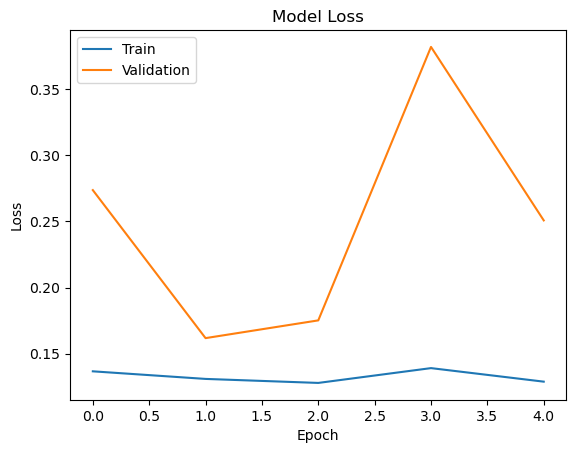

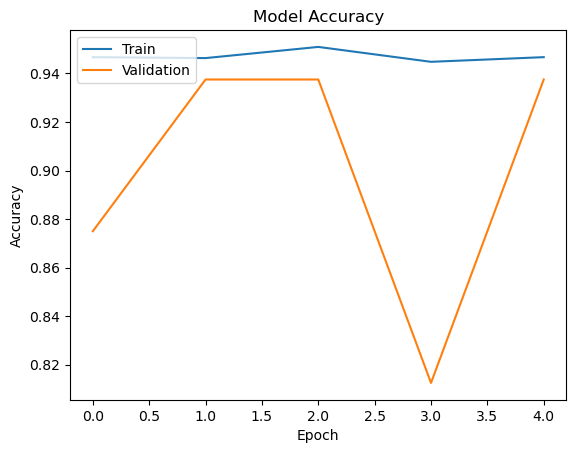

In [54]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


F1: 0.8889


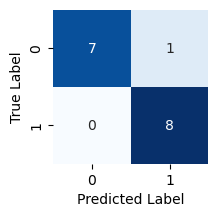

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sns

val_images = []
val_labels = []

for img, label in val_ds:
  val_images.append(img)
  val_labels.append(label)

val_images = np.vstack(val_images)
val_labels = np.vstack(val_labels).squeeze().astype(int)

# TODO: create confusion matrix and compute metrics here
# and do the same for test set

# Predictions
pred = cnn.predict(val_images).squeeze()


# plot the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_matrix(val_labels, pred > 0.5), annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# F1 score
precision = precision_score(val_labels, pred > 0.5)
recall = recall_score(val_labels, pred > 0.5)
f1 = 2 * (precision * recall) / (precision + recall)

print(f'F1: {precision:.4f}')